<center><h1>CheXpert dataset exploration</h1></center>

CheXpert is a large public dataset \cite{Irvin_2019} for chest radiograph interpretation, consisting of 224,316 chest radiographs of 65,240 patients labeled for the presence of 14 observations which include Atelectasis,Cardiomegaly, Consolidation, Edema, Pleural Effusion, Pneumonia, Pneumothorax, Enlarged Cardiom, Lung Lesion, Pleural Other, Fracture and Support Device. For each label, it could be assigned  as positive, negative, or uncertain.

In the experiment, we used CheXpert-v1.0-small dataset published on [Kaggle](https://www.kaggle.com/datasets/ashery/chexpert). This dataset is a smaller, downsampled version of the original dataset.


@article{Irvin_2019,
   title={CheXpert: A Large Chest Radiograph Dataset with Uncertainty Labels and Expert Comparison},
   volume={33},
   ISSN={2159-5399},
   url={http://dx.doi.org/10.1609/aaai.v33i01.3301590},
   DOI={10.1609/aaai.v33i01.3301590},
   number={01},
   journal={Proceedings of the AAAI Conference on Artificial Intelligence},
   publisher={Association for the Advancement of Artificial Intelligence (AAAI)},
   author={Irvin, Jeremy and Rajpurkar, Pranav and Ko, Michael and Yu, Yifan and Ciurea-Ilcus, Silviana and Chute, Chris and Marklund, Henrik and Haghgoo, Behzad and Ball, Robyn and Shpanskaya, Katie and Seekins, Jayne and Mong, David A. and Halabi, Safwan S. and Sandberg, Jesse K. and Jones, Ricky and Larson, David B. and Langlotz, Curtis P. and Patel, Bhavik N. and Lungren, Matthew P. and Ng, Andrew Y.},
   year={2019},
   month=jul, pages={590–597} }

https://www.kaggle.com/datasets/ashery/chexpert


In [8]:
import zipfile
import pandas as pd
import numpy as np
import zipfile
import ast
import matplotlib.pyplot as plt
import os

### get files

In [9]:
CheXpert = r"E:\迅雷下载\CheXpert\data\CheXpert-v1.0-small.zip"
unzip_folder = r"E:\迅雷下载\CheXpert\data\unzip_folder"

training_csv = r"E:\迅雷下载\CheXpert\data\unzip_folder\CheXpert-v1.0-small\train.csv"
validation_csv = r"E:\迅雷下载\CheXpert\data\unzip_folder\CheXpert-v1.0-small\valid.csv"

pwd = os.getcwd()
Datatsets = {'MIMIC': [pwd + "/../data/project_using_data/all_train_data_4_12_AP_PA.csv",
                       pwd + r"/../data/project_using_data/all_test_data_4_12_AP_PA.csv"],
             "NIH": ["/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/training_val_dataset.csv", 
                     "/public_bme/data/lds/CXR_datasets/NIH_chest14_dataset/testing_dataset.csv"],
             "CheXpert": ["/public_bme/data/lds/CXR_datasets/CheXpert/data/data/CheXpert-v1.0-small/CheXpert_training.csv",
                          "/public_bme/data/lds/CXR_datasets/CheXpert/data/data/CheXpert-v1.0-small/CheXpert_validation.csv"]
}

In [14]:
# # 定义zip文件的路径
# zip_file_path = CheXpert

# # 定义解压缩后文件的目标文件夹路径
# extract_to_folder = unzip_folder

# # 创建一个ZipFile对象
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # 解压缩文件到目标文件夹
#     zip_ref.extractall(extract_to_folder)

# print("Zip文件已解压缩到目标文件夹")

In [120]:
training = pd.read_csv(training_csv)
validation= pd.read_csv(validation_csv)

In [16]:
bold_start = "\033[1m"
bold_end = "\033[0m"
print(f"the number of samples in the training dataset: {bold_start}{len(training)}{bold_end}")
print(f"the number of samples in the validation dataset: {bold_start}{len(validation)}{bold_end}")



the number of samples in the training dataset: 223414
the number of samples in the validation dataset: 234


In [17]:
training['Atelectasis'].value_counts()
value_counts = {"col": validation[validation["AP/PA"] == "AP"]["Pleural Other"].value_counts(dropna=False)}

# 打印每列不同值的个数
for col, counts in value_counts.items():
    print(f"\n{col} 列的不同值个数：")
    print(counts)
    


col 列的不同值个数：
Pleural Other
0.0    168
1.0      1
Name: count, dtype: int64


In [18]:
validation["AP/PA"].value_counts(dropna=False)

AP/PA
AP     169
PA      33
NaN     32
Name: count, dtype: int64

In [19]:
validation.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Labeling strategy

Each label column contains one of four values: 1.0, -1.0, 0.0, or missing. These labels have the following interpretation:

- 1.0 - The label was positively mentioned in the associated study, and is present in one or more of the corresponding images
e.g. "A large pleural effusion"   
- 0.0 - The label was negatively mentioned in the associated study, and therefore should not be present in any of the corresponding images
e.g. "No pneumothorax."   
- -1.0 - The label was either: 
  (1) mentioned with uncertainty in the report, and therefore may or may not be present to some degree in the corresponding image, or (2) mentioned with ambiguous language in the report and it is unclear if the pathology exists or not    
  Explicit uncertainty: "The cardiac size cannot be evaluated."  
  Ambiguous language: "The cardiac contours are stable."  
- Missing (empty element) - No mention of the label was made in the report
---
In this project, I using   
`1` represent `positive`; (same with the original category indicator)   
`0` represent `negative`; (same with the original category indicator)  
`0` represent `Nan`; Reasonably assume that `Missing` value in the original table indicates the absence of certain of disease, in this case, `Nan` is replace by `0`;  
`uncertainty` is more complicate to preprocess, and there are multiple strategies:  
- binary: categorize the `uncertainty` into no-postive case, in this it would be represented with 0
- binary_2: reference the strategies used in the paper [[1]](https://arxiv.org/pdf/1901.07031.pdf) and [[2]](https://arxiv.org/pdf/2211.14929)
  - `Atelectasis` and `Edema`: U-ones
  - `Cardiomegaly`: multi-class
  - *`rest`*: U-zeros
  - `ignore`: U-ignore, ignore the uncertainty cases and training with mask binary cross entropy
  - > Strategy_1 : `Atelectasis`, `Edema`: U-ones; and the `rest`: U-zeros.
  - > Strategy_2 : U-ignore, ignore the uncertainty cases
  
- multiple-classes: in this case, `uncertainty` will be viewed as a independent indicator, and would be represented with `2` 
  - -1 is not applicable for cross-entropy in python

In [123]:
# for row in training.iterrows():
#   print(row)
training_AP_PA = training[training["AP/PA"].isin(["AP", "PA"])]
training_AP_PA
validation_AP_PA = validation[validation["AP/PA"].isin(["AP", "PA"])]

In [124]:
CHEXPERT_LABELS = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 
                   'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion','Pleural Other', 'Pneumonia', 
                   'Pneumothorax', "Support Devices"
]
print(CHEXPERT_LABELS)
cols = ["Path", "AP/PA"]+CHEXPERT_LABELS

training_AP_PA_disease = training_AP_PA.loc[:, cols]
training_AP_PA_disease

validation_AP_PA_disease = validation_AP_PA.loc[:, cols]
validation_AP_PA_disease

['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']


,Path,AP/PA,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,AP,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,AP,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,CheXpert-v1.0-small/valid/patient64545/study1/...,AP,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,AP,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,AP,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
def strategy_1(df, label_name, replace_values):
  #Strategy_1 : `Atelectasis`, `Edema`: U-ones; and the `rest`: U-zeros.
  for row in df.iterrows():
    if pd.isna(i[label_name]):
      i[label_name] = replace_values
  

In [36]:
# 定义要处理的列
special_columns = ['Atelectasis', 'Edema']
all_columns = training_AP_PA_disease.columns.tolist()
other_columns = [col for col in all_columns if col not in special_columns + ['Path']]

# 遍历并替换值
for index, row in training_AP_PA_disease.iterrows():
    for col in special_columns:
        if row[col] == -1:
            training_AP_PA_disease.at[index, col] = 1
        elif pd.isna(row[col]):
          training_AP_PA_disease.at[index, col] = 0
    for col in other_columns:
        if pd.isna(row[col]) or row[col] == -1:
            training_AP_PA_disease.at[index, col] = 0
            

print(training_AP_PA_disease)

                                                     Path AP/PA  Atelectasis  \
0       CheXpert-v1.0-small/train/patient00001/study1/...    AP          0.0   
1       CheXpert-v1.0-small/train/patient00002/study2/...    AP          1.0   
2       CheXpert-v1.0-small/train/patient00002/study1/...    AP          0.0   
4       CheXpert-v1.0-small/train/patient00003/study1/...    AP          0.0   
5       CheXpert-v1.0-small/train/patient00004/study1/...    PA          0.0   
...                                                   ...   ...          ...   
223409  CheXpert-v1.0-small/train/patient64537/study2/...    AP          1.0   
223410  CheXpert-v1.0-small/train/patient64537/study1/...    AP          1.0   
223411  CheXpert-v1.0-small/train/patient64538/study1/...    AP          0.0   
223412  CheXpert-v1.0-small/train/patient64539/study1/...    AP          1.0   
223413  CheXpert-v1.0-small/train/patient64540/study1/...    AP          0.0   

        Cardiomegaly  Consolidation  Ed

In [37]:
# 定义要处理的列
special_columns = ['Atelectasis', 'Edema']
all_columns = validation_AP_PA_disease.columns.tolist()
other_columns = [col for col in all_columns if col not in special_columns + ['Path']]

# 遍历并替换值
for index, row in validation_AP_PA_disease.iterrows():
    for col in special_columns:
        if row[col] == -1:
            validation_AP_PA_disease.at[index, col] = 1
        elif pd.isna(row[col]):
          validation_AP_PA_disease.at[index, col] = 0
    for col in other_columns:
        if pd.isna(row[col]) or row[col] == -1:
            validation_AP_PA_disease.at[index, col] = 0

# print(validation_AP_disease)

In [38]:
training_AP_PA_disease.head()

,Path,AP/PA,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,AP,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CheXpert-v1.0-small/train/patient00004/study1/...,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 在实际的应用中不需要‘combination’列，在dataset中直接通过iloc来获取multi-labels
# training_AP_PA_disease['Combined'] = training_AP_PA_disease.iloc[:, 1:].apply(lambda row: row.tolist(), axis=1)
# print(training_AP_PA_disease.iloc[0,:]["Combined"])
# training_AP_PA_disease.head()



In [39]:
# 在实际的应用中不需要‘combination’列，在dataset中直接通过iloc来获取multi-labels
# validation_AP_PA_disease['Combined'] = validation_AP_PA_disease.iloc[:, 1:].apply(lambda row: row.tolist(), axis=1)
# print(validation_AP_PA_disease.iloc[0,:]["Combined"])
# validation_AP_PA_disease.head()

In [41]:
training_AP_PA_disease.to_csv("./CheXpert_training.csv", index=False)
training_AP_PA_disease = pd.read_csv("./CheXpert_training.csv")
training_AP_PA_disease.head()

,Path,AP/PA,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,AP,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/train/patient00003/study1/...,AP,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/train/patient00004/study1/...,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
validation_AP_PA_disease.to_csv("./CheXpert_validation.csv", index=False)
validation_AP_PA_disease = pd.read_csv("./CheXpert_validation.csv")
validation_AP_PA_disease.head()

,Path,AP/PA,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,AP,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64543/study1/...,AP,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CheXpert-v1.0-small/valid/patient64544/study1/...,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64545/study1/...,AP,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [43]:
len(training_AP_PA_disease)

191010

In [44]:
len(validation_AP_PA_disease)

202

---

### label distribution visualization

In [116]:
labels = training_AP_PA_disease.iloc[:,2:]
labels = np.array(labels)
labels
assert (len(labels[0]) == 14)
temp = [0] * 14
size_of_dataset = len(training_AP_PA_disease)

def count_disease(labels):
  for instance in labels:
    # instance_l = ast.literal_eval(instance)
    for index, disease in enumerate(instance):
      # print(disease)
      temp[index] += int(disease)
  return temp   
count_disease_list = count_disease(labels)

count_disease_list

disease_statistic = {}
for disease, count in zip(CHEXPERT_LABELS, count_disease_list):
  disease_statistic[disease] = count
  
labels_distribution = {}
for key, value in disease_statistic.items():
  disease = key
  positive = value
  negative = size_of_dataset - value
  labels_distribution [disease] = [positive, negative] 
labels_distribution['diagnosis'] = ["positive", "negative"]
df = pd.DataFrame(labels_distribution).set_index('diagnosis')
# temp = count_disease(labels)
df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
diagnosis,,,,,,,,,,,,,,
positive,59579,23384,12982,61492,9186,7434,7040,94207,16970,76894,2503,4674,17693,107167
negative,131431,167626,178028,129518,181824,183576,183970,96803,174040,114116,188507,186336,173317,83843


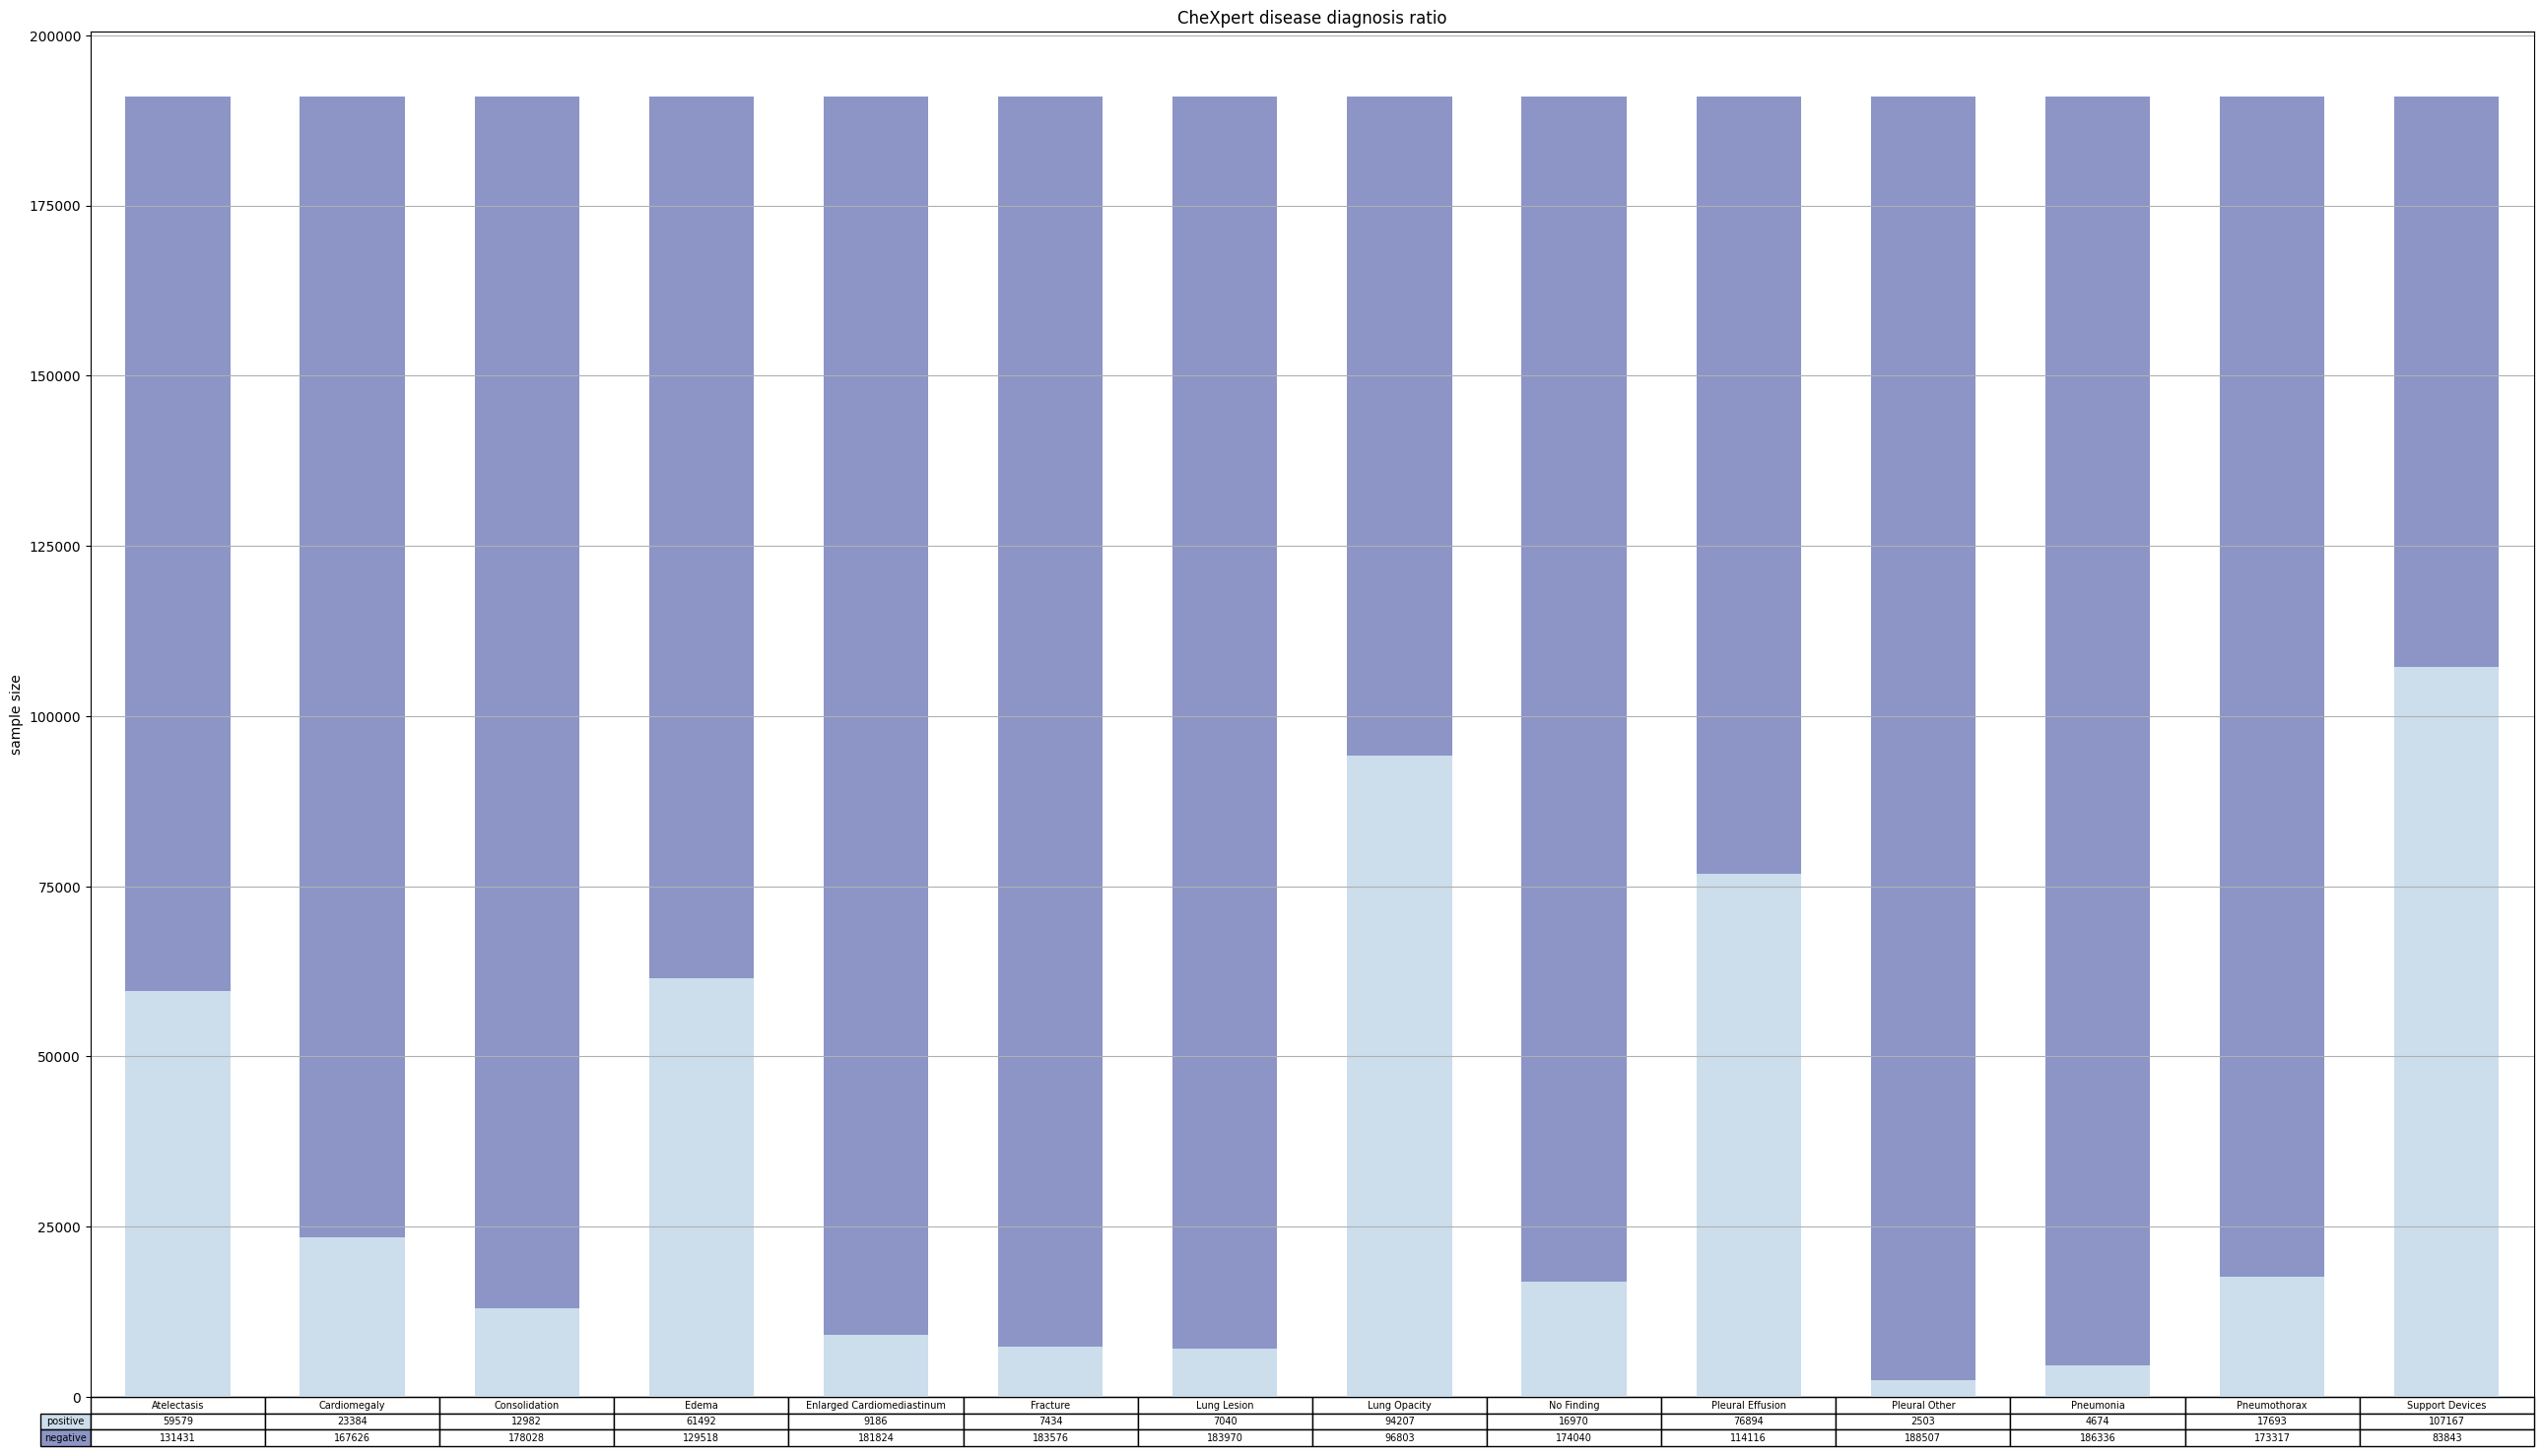

In [117]:
values = np.arange(0, 2500, 500)
value_increment = 1000
plt.figure(figsize=(16*2, 9*2)) 
plt.grid()
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(df)))
n_rows = len(df)
index = np.arange(len(df.columns)) + 0
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(df.columns))
# print(y_offset)
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    # print(f"df.iloc[row, :]: \n{df.iloc[row, :-1]}")
    # print(f"bar_width: {bar_width}"
    tem = y_offset
    plt.bar(index, df.iloc[row, :], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + df.iloc[row, :]
    # print(y_offset)
    cell_text.append([int(x) for x in y_offset])

# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# print(type(cell_text))
# print(cell_text)
# cell_text.reverse()
cell_text = np.array(cell_text)
cell_text[-1] = cell_text[-1] - cell_text[0]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=df.index,
                      rowColours=colors,
                      colLabels=df.columns,
                      loc='bottom',
                      rowLoc = "center", 
                      cellLoc = "center")

# Adjust layout to make room for the table:
# plt.subplots_adjust(left=0.1, bottom=0.1)
# print(cell_text)
# Add label and title
plt.ylabel(f"sample size")
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.xlim(-0.5, 13.5)

plt.title('CheXpert disease diagnosis ratio')
plt.savefig("../../imgs/CheXpert_Diagnosis_Ratio.png")
# Dislay the chart
plt.show()


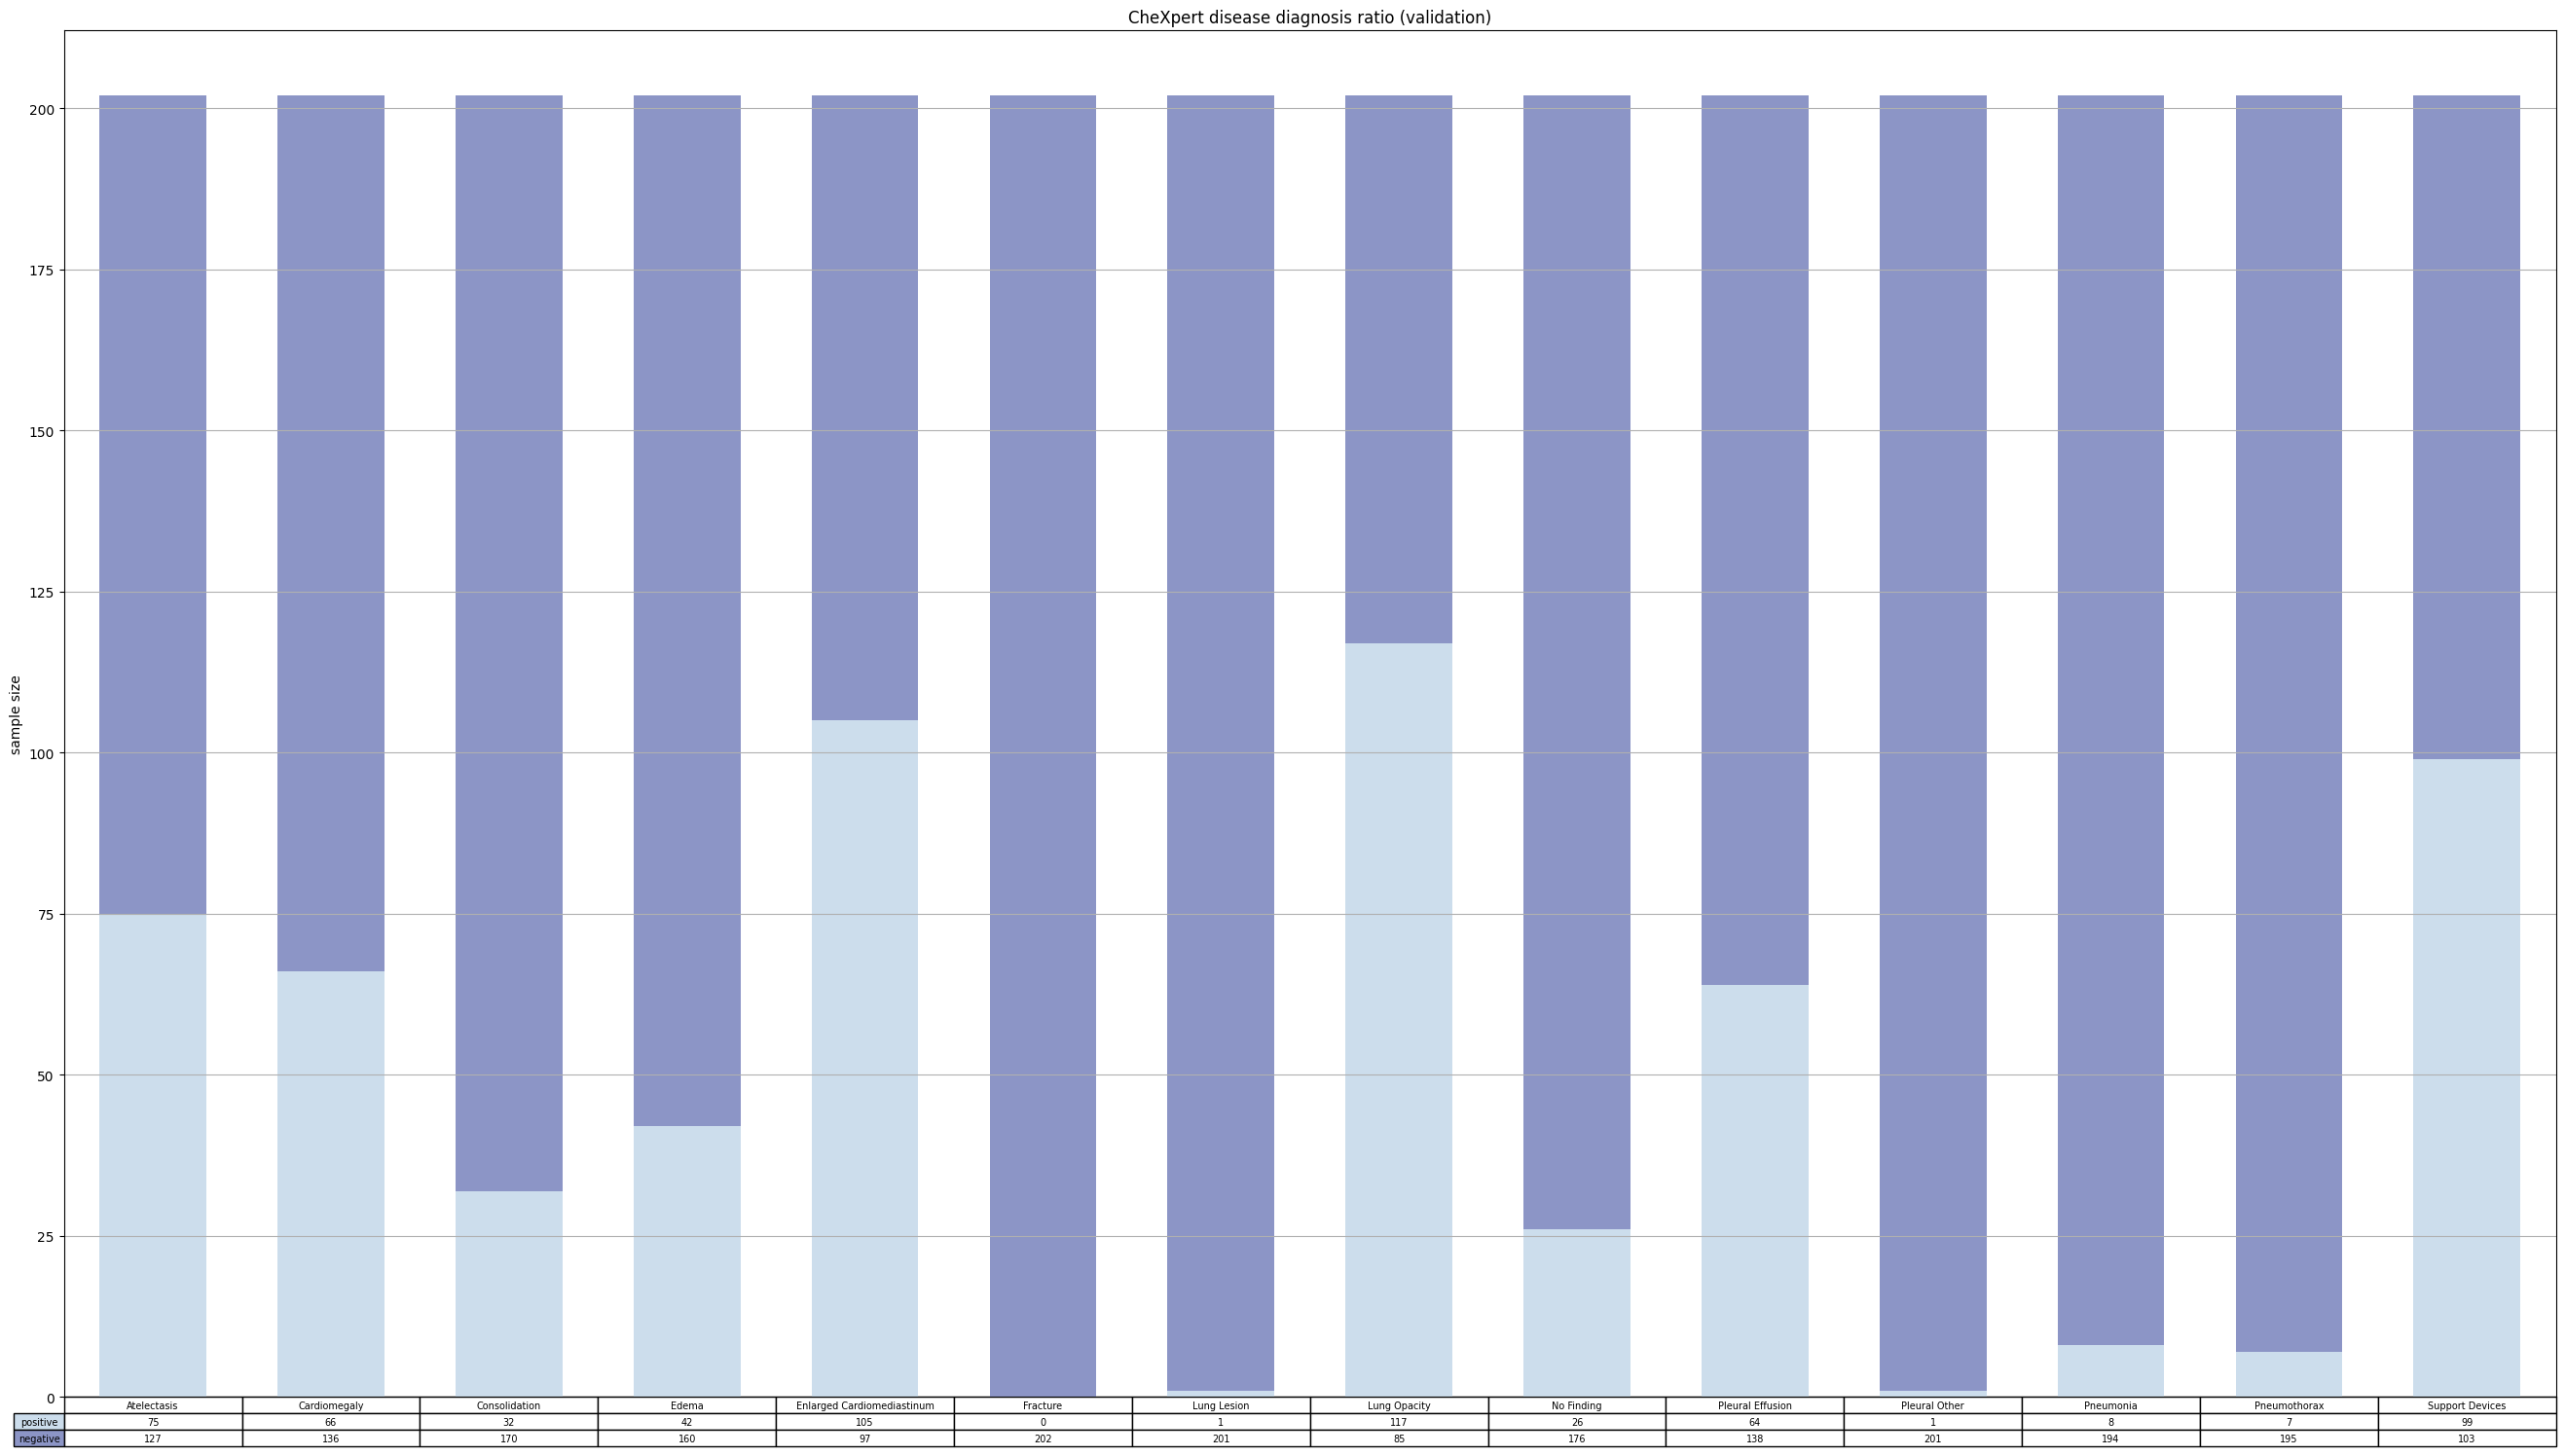

In [114]:

labels = validation_AP_PA_disease.iloc[:,2:]
labels = np.array(labels)
labels
assert (len(labels[0]) == 14)
temp = [0] * 14
size_of_dataset = len(validation_AP_PA_disease)

count_disease_list = count_disease(labels)

count_disease_list

disease_statistic = {}
for disease, count in zip(CHEXPERT_LABELS, count_disease_list):
  disease_statistic[disease] = count
  
labels_distribution = {}
for key, value in disease_statistic.items():
  disease = key
  positive = value
  negative = size_of_dataset - value
  labels_distribution [disease] = [positive, negative] 
labels_distribution['diagnosis'] = ["positive", "negative"]
df = pd.DataFrame(labels_distribution,  )
# temp = count_disease(labels)


values = np.arange(0, 2500, 500)
value_increment = 1000
plt.figure(figsize=(16*2, 9*2)) 
plt.grid()
# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(df)))
# print(colors)
n_rows = len(df)
# print(n_rows)
index = np.arange(len(df.columns)-1)
# print(f"index: {index}")
bar_width = 0.6

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(df.columns)-1)
# print(y_offset)
# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    # print(f"df.iloc[row, :]: \n{df.iloc[row, :-1]}")
    # print(f"bar_width: {bar_width}"
    tem = y_offset
    plt.bar(index, df.iloc[row, :-1], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + df.iloc[row, :-1]
    # print(y_offset)
    cell_text.append([int(x) for x in y_offset])

# Reverse colors and text labels to display the last value at the top.
# colors = colors[::-1]
# print(type(cell_text))
# print(cell_text)
# cell_text.reverse()
cell_text = np.array(cell_text)
cell_text[-1] = cell_text[-1] - cell_text[0]

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=df['diagnosis'],
                      rowColours=colors,
                      colLabels=df.columns,
                      loc='bottom',
                      rowLoc = "center", 
                      cellLoc = "center")

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.1)

# Add label and title
plt.ylabel(f"sample size")
# plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.xlim(-0.5, 13.5)
plt.title('CheXpert disease diagnosis ratio (validation)')
plt.savefig("../../imgs/CheXpert_Diagnosis_validation_Ratio.png")
# Dislay the chart
plt.show()


## chord plot in CheXpert

In [ ]:
CheXpert_dataset = pd.read_csv("/public_bme/data/lds/CXR_datasets/CheXpert/data/data/CheXpert-v1.0-small/CheXpert_training.csv")
CheXpert_training = "/public_bme/data/lds/CXR_datasets/CheXpert/data/data/CheXpert-v1.0-small/CheXpert_training.csv"
CheXpert_validation = "/public_bme/data/lds/CXR_datasets/CheXpert/data/data/CheXpert-v1.0-small/CheXpert_validation.csv"

In [ ]:
print(CheXpert_dataset.columns)
CheXpert_dataset.head()


Index(['Path', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
       'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
       'Pneumothorax', 'Support Devices', 'Combined'],
      dtype='object')


,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,Combined
0,CheXpert-v1.0-small/train/patient00001/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
1,CheXpert-v1.0-small/train/patient00002/study2/...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
2,CheXpert-v1.0-small/train/patient00002/study1/...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
3,CheXpert-v1.0-small/train/patient00003/study1/...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,CheXpert-v1.0-small/train/patient00004/study1/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."


In [ ]:
import pandas as pd
import numpy as np
import math
from d3blocks import D3Blocks

def draw(path  = CheXpert_training, name = None):
  # 假设 CHEXPERT_LABELS 是你的标签列表
  CHEXPERT_LABELS = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
        'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity',
        'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia',
        'Pneumothorax', 'Support Devices']

  # 读取数据
  df = pd.read_csv(path)

  # 移除 'Image Index' 列，只保留标签列
  labels_df = df.drop(columns=['Path', "Combined"])

  # 计算共现矩阵
  co_occurrence_matrix = labels_df.T.dot(labels_df).values

  # 将对角线元素置为0，因为我们只关心标签之间的共现
  np.fill_diagonal(co_occurrence_matrix, 0)

  # 创建空的 DataFrame
  df_undirected = pd.DataFrame(columns=['source', 'target', 'weight'])

  # 填充 DataFrame
  for i, source_label in enumerate(CHEXPERT_LABELS):
      for j, target_label in enumerate(CHEXPERT_LABELS):
          if i < j:  # 只处理上三角矩阵，确保只添加一次连接
              weight = co_occurrence_matrix[i, j]
              df_undirected = pd.concat([df_undirected, pd.DataFrame({'source': [source_label], 'target': [target_label], 'weight': [weight]})], ignore_index=True)

  print(df_undirected)

  # 创建 D3Blocks 实例
  d3 = D3Blocks(chart="Chord", frame=False)

  # 设置节点和边的属性
  d3.set_node_properties(df_undirected, opacity=0.5, cmap='tab20')
  d3.set_edge_properties(df_undirected, color='source', opacity='source')

  # 显示图表
  d3.show(title=f"{name}", arrowhead=-1, filepath=f"./{name}.html")

In [ ]:
draw(path  = CheXpert_training, name = "CheXpert_training")

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [title]: CheXpert_training
[d3blocks] >INFO> Set [arrowhead]: -1
[d3blocks] >INFO> Set [filepath]: ./CheXpert_training.html
[d3blocks] >INFO> File already exists and will be overwritten: [./CheXpert_training.html]


           source                      target   weight
0     Atelectasis                Cardiomegaly   7171.0
1     Atelectasis               Consolidation   3839.0
2     Atelectasis                       Edema  18921.0
3     Atelectasis  Enlarged Cardiomediastinum   2732.0
4     Atelectasis                    Fracture   2012.0
..            ...                         ...      ...
86  Pleural Other                Pneumothorax    200.0
87  Pleural Other             Support Devices   1071.0
88      Pneumonia                Pneumothorax    126.0
89      Pneumonia             Support Devices   1582.0
90   Pneumothorax             Support Devices  10957.0

[91 rows x 3 columns]


[d3blocks] >INFO> Open browser: /home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/Notebooks/CheXpert_training.html


In [ ]:

draw(path  = CheXpert_validation, name = "CheXpert_validation")

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [title]: CheXpert_validation
[d3blocks] >INFO> Set [arrowhead]: -1
[d3blocks] >INFO> Set [filepath]: ./CheXpert_validation.html


[d3blocks] >INFO> File already exists and will be overwritten: [./CheXpert_validation.html]


           source                      target  weight
0     Atelectasis                Cardiomegaly    34.0
1     Atelectasis               Consolidation    26.0
2     Atelectasis                       Edema    20.0
3     Atelectasis  Enlarged Cardiomediastinum    50.0
4     Atelectasis                    Fracture     0.0
..            ...                         ...     ...
86  Pleural Other                Pneumothorax     0.0
87  Pleural Other             Support Devices     1.0
88      Pneumonia                Pneumothorax     0.0
89      Pneumonia             Support Devices     3.0
90   Pneumothorax             Support Devices     4.0

[91 rows x 3 columns]


[d3blocks] >INFO> Open browser: /home_data/home/v-liudsh/coding/constrastive_P/diagnosisP/exchange/Fine-Grained_Features_Alignment_via_Constrastive_Learning/Notebooks/CheXpert_validation.html


---
## disease distribution  in AP/PA view

In [128]:
training_AP_PA_disease = pd.read_csv("./CheXpert_training.csv")
training_AP_disease = training_AP_PA_disease[training_AP_PA_disease["AP/PA"] == "AP"]
training_PA_disease = training_AP_PA_disease[training_AP_PA_disease["AP/PA"] == "PA"]

In [133]:
PA_stat = training_PA_disease[['Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']].sum()

AP_stat = training_AP_disease[['Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']].sum()
AP_stat


'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'

Atelectasis                   53140.0
Cardiomegaly                  20475.0
Consolidation                 11484.0
Edema                         58944.0
Enlarged Cardiomediastinum     7750.0
Fracture                       6023.0
Lung Lesion                    4918.0
Lung Opacity                  84471.0
No Finding                    11471.0
Pleural Effusion              68816.0
Pleural Other                  1491.0
Pneumonia                      3476.0
Pneumothorax                  15891.0
Support Devices               99028.0
dtype: float64

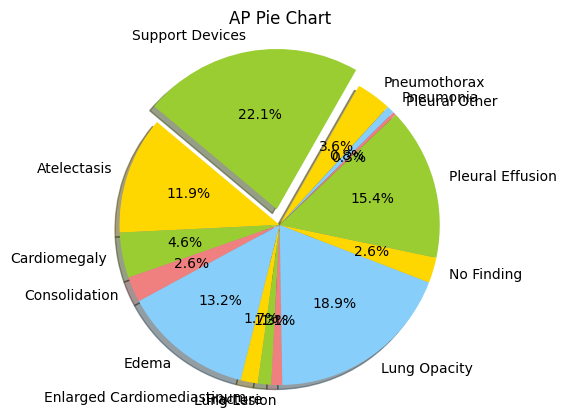

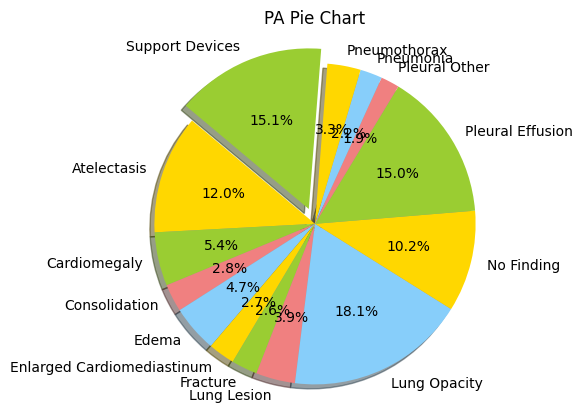

In [144]:
# 示例数据
labels = ['Atelectasis', 'Cardiomegaly', 'Consolidation',
       'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
       'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']
sizes = np.array(AP_stat)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'gold', 'yellowgreen']
explode = [0., 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0,] # 将第一个切片 "爆炸" 出来
explode[sizes.argmax()] = 0.1
# 绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # 确保饼图是圆形的
plt.title('AP Pie Chart')
plt.show()

sizes = np.array(PA_stat)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.axis('equal')  # 确保饼图是圆形的
plt.title('PA Pie Chart')
plt.show()


---
